No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

         90%        68%        0.5    RCP
0 -64.996575 -58.492793 -31.900585     26
1 -53.871821 -40.371410 -30.256717     45
2 -44.154360 -28.135587 -15.309336     85
3 -31.765399 -31.164003 -31.060192  Union


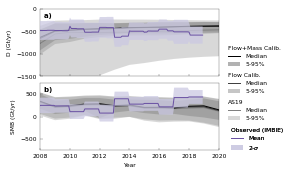

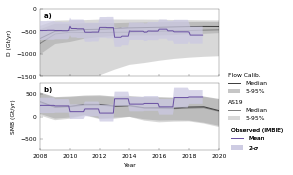

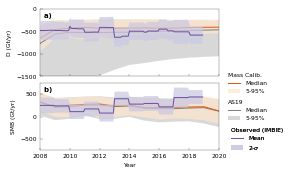

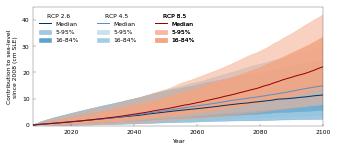

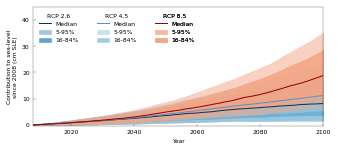

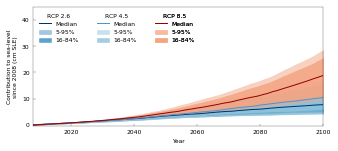

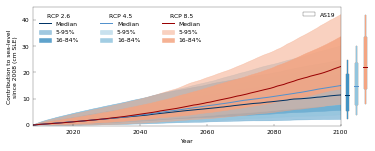

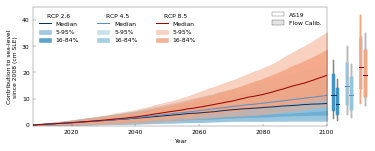

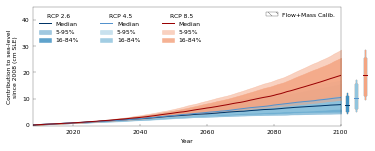

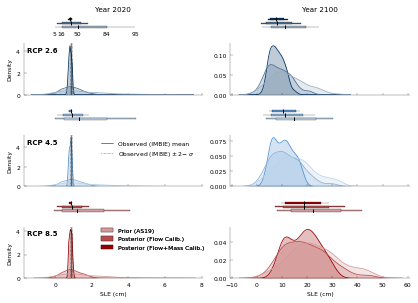

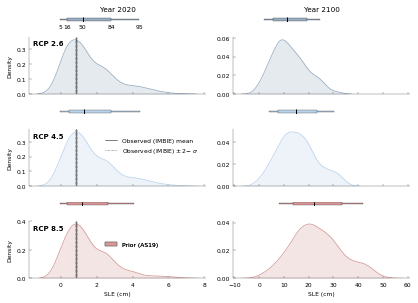

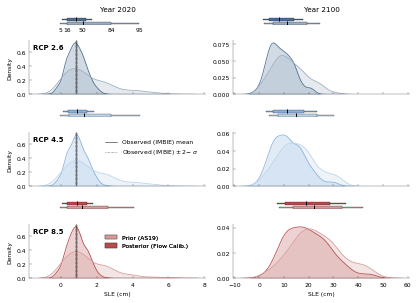

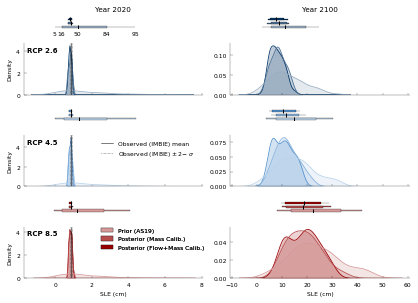

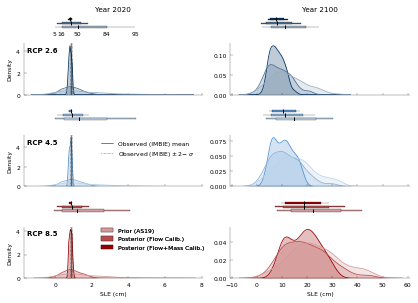

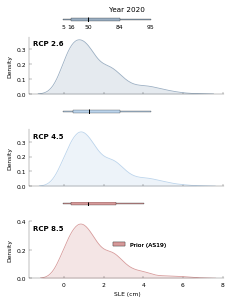

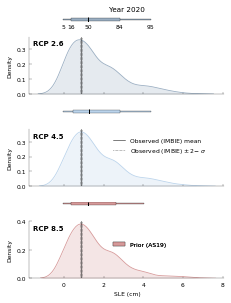

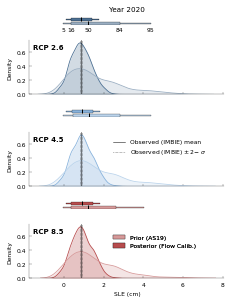

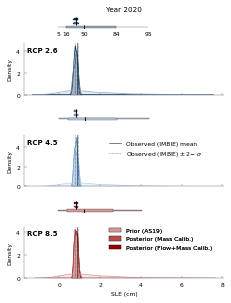

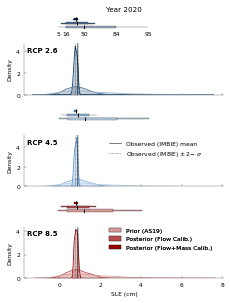

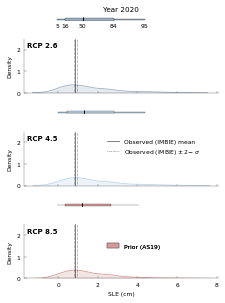

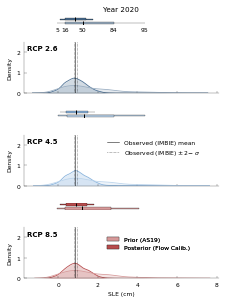

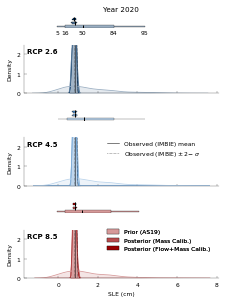

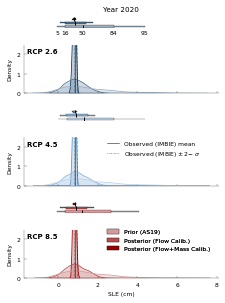

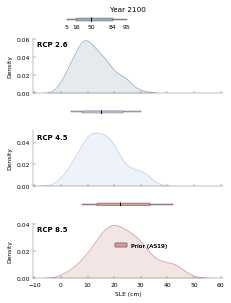

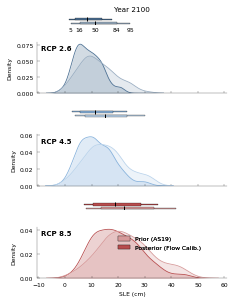

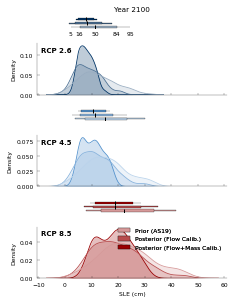

In [49]:
run calibrate-as19.py  

## Cumulative counts as measure of how many members per ensemble

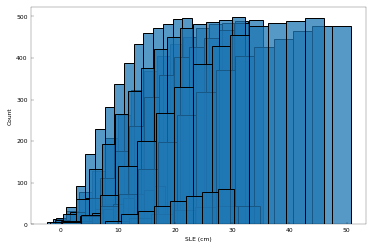

In [50]:
no_ens = []
for k, rcp in enumerate(rcps):
    r_df = all_2100_df[all_2100_df["RCP"] == rcp]
    for ens in ["AS19", "Mass Calib.", "Flow Calib.", "Flow+Mass Calib."]:
        df = r_df[r_df["Ensemble"] == ens]
        sb = sns.histplot(data=df, stat="count", cumulative=True, x="SLE (cm)")
        counts = [h.get_height() for h in sb.patches]
        no_ens.append([rcp, ens, counts[-1]])
no_df = pd.DataFrame(data=no_ens, columns=["RCP", "Ensemble", "No members"])

## Relative improvement "Mass Calib." -> "Flow+Mass Calib."

In [51]:
for rcp in rcps:
    df = no_df[no_df["RCP"] == rcp]
    m_v = df[df["Ensemble"] == "Mass Calib."]["No members"].values[0]
    fm_v = df[df["Ensemble"] == "Flow+Mass Calib."]["No members"].values[0]
    rel_change = np.round(fm_v / m_v * 100 - 100)
    print(rcp, rel_change)

26 77.0
45 98.0
85 87.0


In [52]:
no_df

,RCP,Ensemble,No members
0,26,AS19,489
1,26,Mass Calib.,43
2,26,Flow Calib.,497
3,26,Flow+Mass Calib.,76
4,45,AS19,491
5,45,Mass Calib.,46
6,45,Flow Calib.,498
7,45,Flow+Mass Calib.,91
8,85,AS19,478
9,85,Mass Calib.,45


In [53]:
observed

,Year,Mass change (Gt/yr),Mass change uncertainty (Gt/yr),Mass (Gt),Mass uncertainty (Gt),SLE (cm),SLE uncertainty (cm),SLE change uncertainty (cm/yr)
192,2008.0000,-237.2713,81.7723,0.0000,81.7723,-0.000000,0.022558,0.022558
193,2008.0833,-235.5513,81.4822,-19.6293,81.4822,0.005415,0.022478,0.022478
194,2008.1667,-238.1249,82.6815,-39.4730,82.6815,0.010889,0.022809,0.022809
195,2008.2500,-241.5861,83.9167,-59.6052,83.9167,0.016443,0.023149,0.023149
196,2008.3333,-243.9132,83.9632,-79.9313,83.9632,0.022050,0.023162,0.023162
...,...,...,...,...,...,...,...,...
343,2020.5833,-392.9260,123.8880,-3182.8685,123.8880,0.878033,0.034176,0.034176
344,2020.6667,-392.9260,123.8880,-3215.6124,123.8880,0.887065,0.034176,0.034176
345,2020.7500,-392.9260,123.8880,-3248.3562,123.8880,0.896098,0.034176,0.034176
346,2020.8333,-392.9260,123.8880,-3281.1000,123.8880,0.905131,0.034176,0.034176


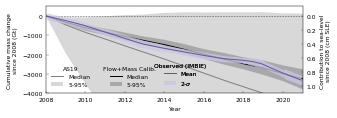

In [67]:
    observed_s = load_imbie(proj_start=1992)

    plot_historical(
        "historical_obs_only.pdf", observed=observed_s, xlims=[1992, 2018], ylims=[-5000, 1000], sigma=1
    )
    plot_historical(
        "historical_w_obs.pdf", simulated=all_df, observed=observed, ensembles=["AS19", "Flow+Mass Calib."], ylims=[-4000, 500]
    )



In [36]:
plot_historical?

In [65]:
observed_s

,Year,Mass (Gt),Mass uncertainty (Gt),Cumulative surface mass balance anomaly (Gt),Cumulative surface mass balance anomaly uncertainty (Gt),Cumulative ice dynamics anomaly (Gt),Cumulative ice dynamics anomaly uncertainty (Gt),SMB (Gt/yr),D (Gt/yr),SMB uncertainty (Gt/yr),D uncertainty (Gt/yr),SLE (cm),SLE uncertainty (cm)
0,1980.000000,NaN,NaN,17.667861,22.721583,NaN,NaN,405.472691,NaN,78.709874,NaN,NaN,NaN
1,1980.083333,NaN,NaN,18.723919,32.133171,NaN,NaN,405.472691,NaN,78.709874,NaN,NaN,NaN
2,1980.166667,NaN,NaN,19.779976,39.354937,NaN,NaN,405.472691,NaN,78.709874,NaN,NaN,NaN
3,1980.250000,NaN,NaN,20.836034,45.443167,NaN,NaN,405.472691,NaN,78.709874,NaN,NaN,NaN
4,1980.333333,NaN,NaN,21.892091,50.807005,NaN,NaN,405.472691,NaN,78.709874,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2018.583333,-3998.465803,344.868007,-1944.840072,501.907312,-2053.625731,547.081162,438.453071,-582.253071,77.031700,95.70853,1.103025,0.095136
464,2018.666667,-4010.449136,345.257579,-1941.035649,502.399682,-2069.413487,547.778369,438.453071,-582.253071,77.031700,95.70853,1.106331,0.095243
465,2018.750000,-4022.432470,345.646711,-1937.231227,502.891569,-2085.201243,548.474689,438.453071,-582.253071,77.031700,95.70853,1.109637,0.095351
466,2018.833333,-4034.415803,346.035406,-1933.426804,503.382976,-2100.988999,549.170127,438.453071,-582.253071,77.031700,95.70853,1.112942,0.095458


In [66]:
plot_historical?